In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r'D:/Desktop/ML project final/train (3).csv', nrows=5000)

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:

X=df.drop('label',axis=1)

In [5]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
4995,4995,Hillary Clinton and Bernie Sanders Meet as The...,Yamiche Alcindor and Patrick Healy,WASHINGTON — With little affection or trust...
4996,4996,Dr. Duke & Andrew Anglin the True Voice of the...,Dr. Patrick Slattery,http://mediaarchives.gsradio.net/dduke/112216....
4997,4997,What It Was Like Onstage During the Oscars 201...,Brooks Barnes and Cara Buckley,LOS ANGELES — It’s one of Hollywood’s most ...
4998,4998,"For Whites Sensing Decline, Donald Trump Unlea...",Nicholas Confessore,The chant erupts in a college auditorium in Wa...


In [6]:

y=df['label']

In [7]:
y.head(20)

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    0
16    0
17    1
18    1
19    0
Name: label, dtype: int64

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [9]:

df=df.dropna()

In [10]:
df.shape

(4380, 5)

In [11]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
df.shape

(4380, 5)

In [13]:
messages=df.copy()

In [14]:
messages.reset_index(inplace=True)

In [15]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re     # used for text pattern matching and substitution
ps = PorterStemmer()   # reduces word to their root form i.e running to run 
corpus = []
#
regex = re.compile('[^a-zA-Z]')    # [^a-zA-Z] matches any character that is not a letter (a-z or A-Z).
stop_words = set(stopwords.words('english'))


for i in range(len(messages)):
    review = regex.sub(' ', messages['text'][i])    #replaces all characters that aren't letters (as per the regex pattern [^a-zA-Z]) with a space 
    review = review.lower().split()    # list is created  / tokenization
    review = [ps.stem(word) for word in review if word not in stop_words]
    corpus.append(' '.join(review))






In [20]:
X.shape



(5000, 4)

In [21]:
corpus[7]

'week michael flynn resign nation secur advis seal propos offic outlin way presid trump lift sanction russia mr flynn gone caught lie discuss sanction russian ambassador propos peac plan ukrain russia remain along push michael cohen presid person lawyer deliv document felix h sater busi associ help mr trump scout deal russia ukrainian lawmak tri rise polit opposit movement shape part mr trump former campaign manag paul manafort time mr trump tie russia peopl connect heighten scrutini investig american intellig agenc f b congress associ remain will eager wade effort behind scene mr trump confound democrat republican alik repeat prais russian presid vladimir v putin desir forg allianc noth illeg unoffici effort propos seem tip toward russian interest may set alarm amateur diplomat say goal simpli help settl gruel conflict cost live want help bring peac mr cohen ask propos contain peac plan andrii v artemenko ukrainian lawmak see leader futur ukrain claim evid name compani wire transfer s

In [22]:


#bag of words
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))   # converts the corpus into a matrix of token counts, row - document, column - feature
X = cv.fit_transform(corpus).toarray()                      #limiting the vocabulary to top 5000 words based on frequency
                                                            # sequence of words to be considered as feauture , unigram, bigram, trigram

In [23]:
X.shape

(4380, 5000)

In [24]:

#the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hous': 2026,
 'dem': 1110,
 'aid': 102,
 'even': 1453,
 'see': 3906,
 'comey': 808,
 'letter': 2447,
 'jason': 2255,
 'tweet': 4620,
 'octob': 3005,
 'subscrib': 4267,
 'american': 162,
 'utah': 4721,
 'imag': 2087,
 'courtesi': 969,
 'michael': 2682,
 'avail': 314,
 'creativ': 981,
 'common': 821,
 'licens': 2462,
 'apolog': 216,
 'doubt': 1256,
 'worst': 4941,
 'person': 3216,
 'world': 4933,
 'week': 4849,
 'fbi': 1578,
 'director': 1190,
 'jame': 2246,
 'accord': 28,
 'democrat': 1113,
 'look': 2514,
 'like': 2470,
 'also': 141,
 'know': 2349,
 'second': 3892,
 'well': 4863,
 'turn': 4617,
 'sent': 3927,
 'announc': 190,
 'email': 1359,
 'may': 2628,
 'relat': 3613,
 'hillari': 1983,
 'clinton': 748,
 'server': 3938,
 'rank': 3532,
 'relev': 3617,
 'committe': 819,
 'hear': 1945,
 'found': 1710,
 'via': 4755,
 'one': 3029,
 'republican': 3654,
 'notifi': 2962,
 'member': 2658,
 'intellig': 2178,
 'judiciari': 2303,
 'oversight': 3097,
 'agenc': 93,
 'review': 3700,
 'recent': 356

In [25]:
y=messages['label']

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [27]:
cv.get_feature_names_out()[:500]

array(['aaron', 'abandon', 'abc', 'abc news', 'abe', 'abedin', 'abil',
       'abl', 'abort', 'abroad', 'absenc', 'absolut', 'absorb', 'absurd',
       'abu', 'abund', 'abus', 'academ', 'academi', 'acceler', 'accept',
       'access', 'access pipelin', 'accid', 'accident', 'accommod',
       'accompani', 'accomplish', 'accord', 'accord report', 'account',
       'accur', 'accus', 'achiev', 'acid', 'acknowledg', 'acquir', 'acr',
       'across', 'across countri', 'act', 'action', 'activ', 'activist',
       'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add',
       'addict', 'addit', 'address', 'adhd', 'adjust', 'admin',
       'administr', 'administr offici', 'admir', 'admiss', 'admit',
       'adopt', 'adult', 'advanc', 'advantag', 'adventur', 'adversari',
       'advertis', 'advic', 'advis', 'advisor', 'advisori', 'advoc',
       'advocaci', 'advocaci group', 'affair', 'affect', 'affili',
       'affirm', 'afford', 'afford care', 'afford care act', 'afghan',
       'afghanist

In [28]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [29]:
count_df.head(20)

,aaron,abandon,abc,abc news,abe,abedin,abil,abl,abort,abroad,...,young man,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MultinomialNB Algorithm

In [30]:
#Multinomial Naive Bayes is a variant of the Naive Bayes algorithm tailored for classification tasks where the 
# feature data represents discrete counts, such as word frequencies in a text document

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
# import itertools

accuracy:   0.898


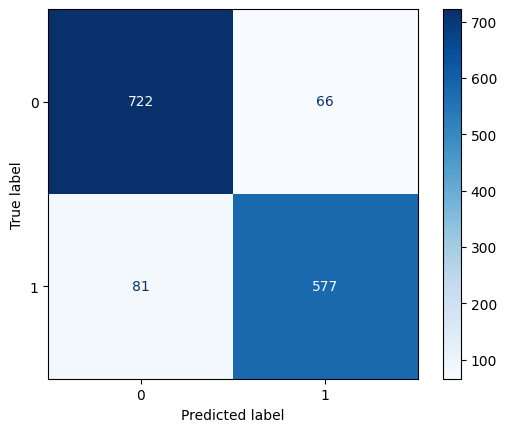

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# AdaBoostClassifier

c:\Users\Parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy:   0.920


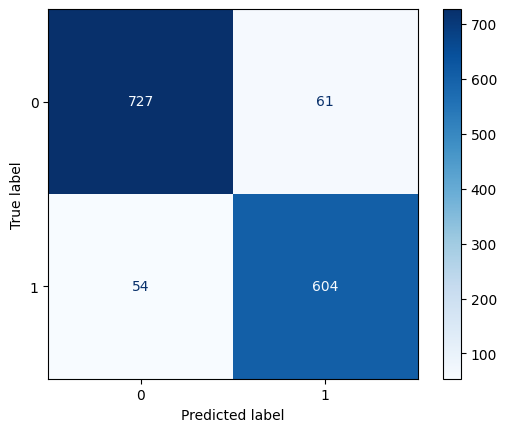

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ada_classifier= AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
pred = ada_classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# DecisionTreeClassifier

accuracy:   0.834


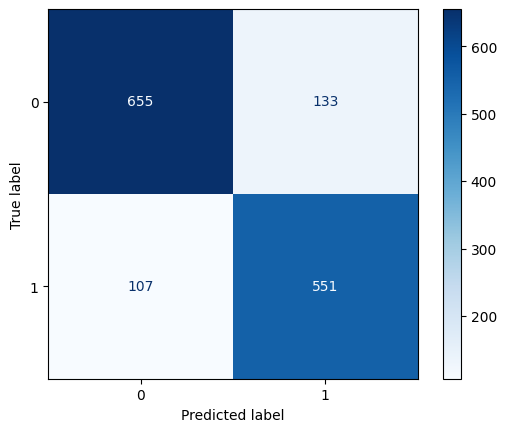

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# LogisticRegression

accuracy:   0.923


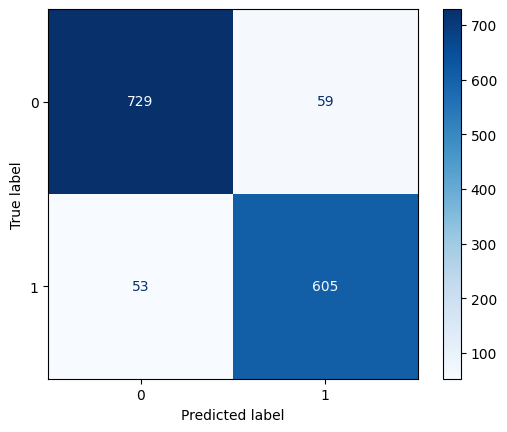

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
pred = log_classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# RandomForestClassifier

accuracy:   0.927


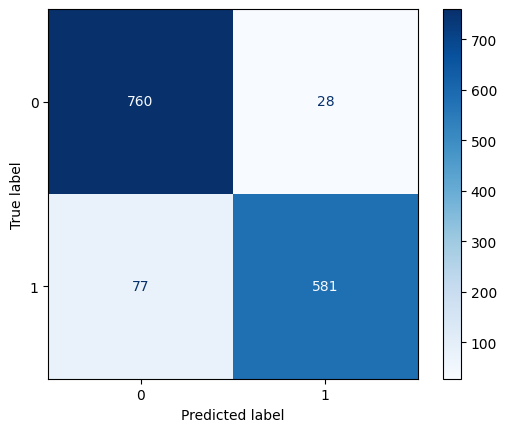

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# SVM

accuracy:   0.909


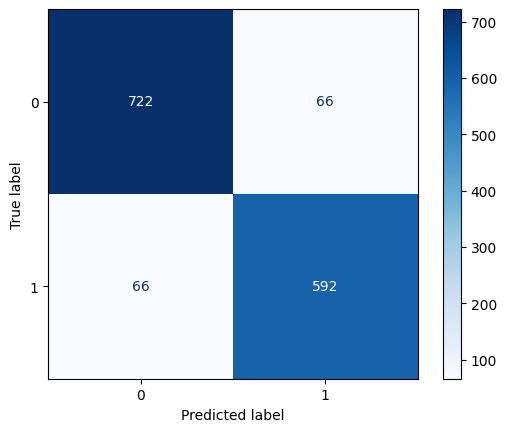

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svclassifier = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')